# Building Model!
**Will try to estimate the mean of priority and percentage of priority 1 to help gage the expectation of calls depending of the weather in San Jose! This is made in the hopes of helping officers to stay more alert during certain weather conditions!**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
calls_df = pd.read_csv('police_calls.csv')
calls_df

,priority,offense_time,calltype_code,call_type,final_dispo_code,final_dispo,address,Timestamp
0,2,02:49:02,1066,SUSPICIOUS PERSON,N,No report required; dispatch record only,[800]-[900] JEANNE AV,2022-01-01 04:29:16
1,2,03:05:51,415,DISTURBANCE,N,No report required; dispatch record only,[1500]-[1600] SOUTHWEST EX,2022-01-01 04:30:36
2,2,04:35:25,911UNK,UNK TYPE 911 CALL,CAN,Canceled,[4800]-[4900] WESTMONT AV,2022-01-01 04:38:27
3,2,03:38:14,SUSCIR,SUSPICIOUS CIRCUMSTANCES,N,No report required; dispatch record only,[3600]-[3700] GREENLEE DR,2022-01-01 04:40:26
4,4,23:25:49,11300,NARCOTICS,A,Arrest Made,E CAPITOL EX & EVERGREEN PL,2022-01-02 05:25:01
...,...,...,...,...,...,...,...,...
3998458,6,14:08:34,1195,VEHICLE STOP,N,No report required; dispatch record only,[5700]-[5800] ALMADEN RD,2024-02-28 14:34:21
3998459,5,14:06:06,22500,PARKING VIOLATION,N,No report required; dispatch record only,[100]-[200] MCCREERY AV,2024-02-28 14:34:23
3998460,2,13:14:37,242,BATTERY,R,Report taken,[0]-[100] N MARKET ST,2024-02-28 14:37:55
3998461,6,13:53:41,1195,VEHICLE STOP,N,No report required; dispatch record only,STORY RD & HOPKINS DR,2024-02-28 14:40:42


In [3]:
weather_df = pd.read_csv('weather_data.csv').drop(columns=['snow', 'snowdepth'])
weather_df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipcover,...,windspeed,winddir,cloudcover,visibility,uvindex,sunrise,sunset,moonphase,conditions,description
0,2022-01-01,55.0,35.1,43.3,55.0,32.5,42.2,0.668,0.000,0.0000,...,5.9,179.7,0.212,8.6,6,07:21:56,17:00:46,0.97,Partially cloudy,Partly cloudy throughout the day.
1,2022-01-02,59.9,33.1,44.0,59.9,29.9,43.1,0.685,0.000,0.0000,...,9.1,157.0,0.254,9.9,6,07:22:04,17:01:35,0.00,Partially cloudy,Partly cloudy throughout the day.
2,2022-01-03,56.0,44.0,50.6,56.0,39.5,49.1,0.765,0.000,0.0000,...,13.7,143.2,0.919,9.9,3,07:22:10,17:02:24,0.03,Overcast,Cloudy skies throughout the day.
3,2022-01-04,61.0,50.0,54.6,61.0,50.0,54.6,0.835,0.001,0.0417,...,10.2,189.1,0.833,9.9,5,07:22:14,17:03:16,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...
4,2022-01-05,62.8,51.1,55.6,62.8,51.1,55.6,0.841,0.000,0.0000,...,11.2,327.2,0.861,9.8,6,07:22:16,17:04:08,0.10,Partially cloudy,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2024-02-27,62.9,44.9,54.3,62.9,43.6,54.2,0.579,0.000,0.0000,...,15.8,324.4,0.231,9.9,8,06:41:52,17:59:18,0.61,Partially cloudy,Partly cloudy throughout the day.
788,2024-02-28,69.7,43.9,55.2,69.7,41.5,54.8,0.580,0.000,0.0000,...,13.8,328.6,0.011,9.9,8,06:40:31,18:00:18,0.65,Clear,Clear conditions throughout the day.
789,2024-02-29,62.8,49.8,55.8,62.8,48.3,55.7,0.741,0.189,0.2083,...,18.1,178.3,0.658,9.2,8,06:39:09,18:01:17,0.68,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.
790,2024-03-01,60.1,52.0,55.6,60.1,52.0,55.6,0.743,0.076,0.4583,...,14.9,178.8,0.950,9.3,6,06:37:46,18:02:16,0.71,"Rain, Overcast",Cloudy skies throughout the day with a chance ...


#### Understanding Priority Codes:
The Priority code range from 1 to 6 in this dataset. Priority 1 includes situations such as life-threatening injuries, active shooter, etc. that requiring immediate response for critical emergency. And as the priority code steps us it becomes more less urgent. So in comparison, Priority 6 is informational or administrative calls that are not urgent and do not require a police response.

In [4]:
# changing timestamp to datetime object
calls_df['Timestamp'] = pd.to_datetime(calls_df["Timestamp"])

# obtaining only date
calls_df['date'] = calls_df['Timestamp'].apply(lambda x: x.date())

In [5]:
# mean priority code per day
mean_priority = calls_df.groupby('date').mean(numeric_only=True).reset_index()
mean_priority

,date,priority
0,2022-01-01,3.211587
1,2022-01-02,3.265840
2,2022-01-03,3.266169
3,2022-01-04,3.423464
4,2022-01-05,3.416274
...,...,...
759,2024-02-28,3.147161
760,2024-02-29,3.323312
761,2024-03-01,3.119522
762,2024-03-02,3.285891


In [6]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime']).apply(lambda x: x.date())

In [7]:
merged_data = pd.merge(mean_priority, weather_df, 
                       left_on='date', right_on='datetime')

In [8]:
merged_data.columns

Index(['date', 'priority', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'humidity', 'precip',
       'precipcover', 'preciptype', 'windgust', 'windspeed', 'winddir',
       'cloudcover', 'visibility', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'description'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score


import numpy as np

## Baseline Model: Linear Regression
Typically people who check weather (weather app on their phone or broadcast) they mainly only look at temperature, precipitation coverage, 

In [10]:
# Features and Prediction
X = merged_data[['feelslikemax', 'feelslikemin', 'feelslike', 'precipcover', 'humidity']]
y = merged_data['priority']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test)

# Calculate RMSE for Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("RMSE for Linear Regression:", rmse_linear)

# Calculate Mean Percentage Error (MPE) for Linear Regression
mpe_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
print("MPE for Linear Regression:", mpe_linear)

# Perform cross-validation for Linear Regression
linear_reg_scores = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')
linear_reg_rmse_cv = np.sqrt(-linear_reg_scores.mean())
print("Cross-validated RMSE for Linear Regression:", linear_reg_rmse_cv)

RMSE for Linear Regression: 0.1657213767398679
MPE for Linear Regression: 0.04046377849274069
Cross-validated RMSE for Linear Regression: 0.19871783894018202


## Model: Gradient Boosting Regressor

In [11]:
# Features and Prediction
X = merged_data.drop(columns=['date', 'datetime', 'preciptype', 'sunrise',
                             'sunset', 'description'])
y = merged_data['priority']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for features
col_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['conditions']) 
    ],
    remainder='passthrough'
)

GBR_model = Pipeline([
    ('col_trans', col_transformer),
    ('gradient_boost', GradientBoostingRegressor(random_state=42))
])

GBR_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = GBR_model.predict(X_test)

# Calculate RMSE for Gradient Boosting Regression
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print("RMSE for Gradient Boosting Regression:", rmse_gbr)

# Calculate Mean Percentage Error (MPE) for Gradient Boosting Regression
mpe_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)
print("MPE for Gradient Boosting Regression:", mpe_gbr)

# Perform cross-validation for Gradient Boosting Regression
gbr_scores = cross_val_score(GBR_model, X, y, cv=5, scoring='neg_mean_squared_error')
gbr_rmse_cv = np.sqrt(-gbr_scores.mean())
print("Cross-validated RMSE for Gradient Boosting Regression:", gbr_rmse_cv)

RMSE for Gradient Boosting Regression: 0.00718086269928254
MPE for Gradient Boosting Regression: 0.0007411848437116788
Cross-validated RMSE for Gradient Boosting Regression: 0.077275446967282


## Model: Histogram-based Gradient Boosting Regressor

In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Features and Prediction
X = merged_data.drop(columns=['date', 'datetime', 'preciptype', 'sunrise',
                             'sunset', 'description'])
y = merged_data['priority']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for features
col_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['conditions']) 
    ],
    remainder='passthrough'
)

HGBR_model = Pipeline([
    ('col_trans', col_transformer),
    ('hist_gradient_boost', HistGradientBoostingRegressor(random_state=42))
])

HGBR_model.fit(X_train, y_train)

# Predict on the test set
y_pred_hgbr = HGBR_model.predict(X_test)

# Calculate RMSE for Gradient Boosting Regression
rmse_hgbr = np.sqrt(mean_squared_error(y_test, y_pred_hgbr))
print("RMSE for Gradient Boosting Regression:", rmse_hgbr)

# Calculate Mean Percentage Error (MPE) for Gradient Boosting Regression
mpe_hgbr = mean_absolute_percentage_error(y_test, y_pred_hgbr)
print("MPE for Gradient Boosting Regression:", mpe_hgbr)

# Perform cross-validation for Gradient Boosting Regression
hgbr_scores = cross_val_score(HGBR_model, X, y, cv=5, scoring='neg_mean_squared_error')
hgbr_rmse_cv = np.sqrt(-hgbr_scores.mean())
print("Cross-validated RMSE for Gradient Boosting Regression:", hgbr_rmse_cv)

RMSE for Gradient Boosting Regression: 0.027442420384414783
MPE for Gradient Boosting Regression: 0.003111849901887522
Cross-validated RMSE for Gradient Boosting Regression: 0.08930197514476092


*HistGBR performing worse than GBR model..!*

#### Correlation Heatmap for mean Priority table

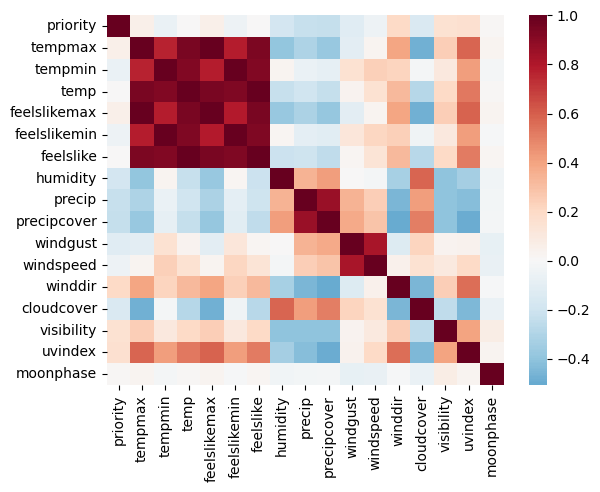

In [13]:
sns.heatmap(merged_data.corr(numeric_only=True), cmap="RdBu_r", center=0);

## Trying to predict percent of Priority 1 calls

In [14]:
daily_counts = calls_df.groupby('date')['priority'].value_counts().unstack(fill_value=0)
daily_counts['total_calls'] = daily_counts.sum(axis=1)
daily_counts['percentage_priority_1'] = (daily_counts[1] / daily_counts['total_calls']) * 100
daily_counts.head()

priority,1,2,3,4,5,6,total_calls,percentage_priority_1
date,,,,,,,,
2022-01-01,133,1953,1673,896,210,693,5558,2.392947
2022-01-02,140,1610,1841,476,280,735,5082,2.754821
2022-01-03,147,1715,2079,630,294,763,5628,2.611940
2022-01-04,127,1750,1701,623,357,1008,5566,2.281710
2022-01-05,147,1904,1862,497,406,1120,5936,2.476415


In [15]:
# creating table with priority 1 percentage per day

daily_prio_1 = daily_counts.reset_index()[['date', 'percentage_priority_1']]
merged_data_2 = pd.merge(daily_prio_1, weather_df, 
                       left_on='date', right_on='datetime')

### GBR

In [16]:
# Features and Prediction
X = merged_data_2.drop(columns=['date', 'datetime', 'preciptype', 'sunrise',
                             'sunset', 'description'])
y = merged_data_2['percentage_priority_1']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for features
col_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['conditions']) 
    ],
    remainder='passthrough'
)

GBR_model = Pipeline([
    ('col_trans', col_transformer),
    ('gradient_boost', GradientBoostingRegressor(random_state=42))
])

GBR_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = GBR_model.predict(X_test)

# Calculate RMSE for Gradient Boosting Regression
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print("RMSE for Gradient Boosting Regression:", rmse_gbr)

# Calculate Mean Percentage Error (MPE) for Gradient Boosting Regression
mpe_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)
print("MPE for Gradient Boosting Regression:", mpe_gbr)

# Perform cross-validation for Gradient Boosting Regression
gbr_scores = cross_val_score(GBR_model, X, y, cv=5, scoring='neg_mean_squared_error')
gbr_rmse_cv = np.sqrt(-gbr_scores.mean())
print("Cross-validated RMSE for Gradient Boosting Regression:", gbr_rmse_cv)

RMSE for Gradient Boosting Regression: 0.018106196871120948
MPE for Gradient Boosting Regression: 0.003140905146782248
Cross-validated RMSE for Gradient Boosting Regression: 0.0953447401272943


#### Correlation Heatmap for Priority 1 Percentage

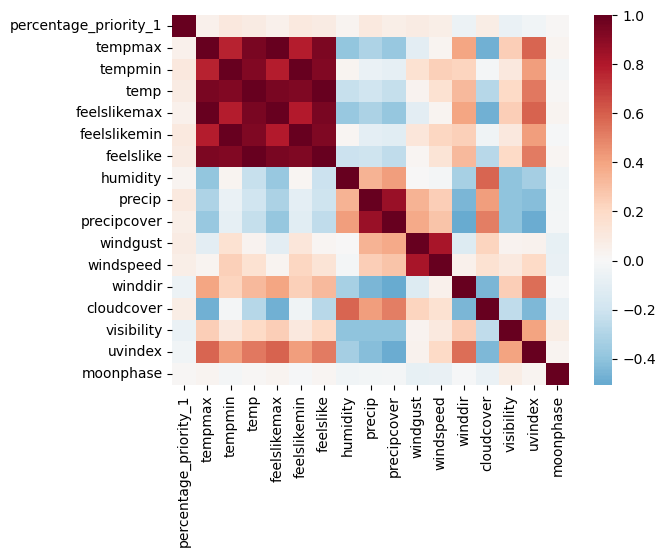

In [17]:
sns.heatmap(merged_data_2.corr(numeric_only=True), cmap="RdBu_r", center=0);

### HistGBR

In [18]:
# Features and Prediction
X = merged_data_2.drop(columns=['date', 'datetime', 'preciptype', 'sunrise',
                             'sunset', 'description', 'moonphase', 'feelslikemin', 'feelslikemax', 'feelslike',
                                'humidity', 'uvindex'])
y = merged_data_2['percentage_priority_1']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for features
col_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['conditions']) 
    ],
    remainder='passthrough'
)

GBR_model = Pipeline([
    ('col_trans', col_transformer),
    ('gradient_boost', GradientBoostingRegressor(random_state=42))
])

GBR_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = GBR_model.predict(X_test)

# Calculate RMSE for Gradient Boosting Regression
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print("RMSE for Gradient Boosting Regression:", rmse_gbr)

# Calculate Mean Percentage Error (MPE) for Gradient Boosting Regression
mpe_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)
print("MPE for Gradient Boosting Regression:", mpe_gbr)

# Perform cross-validation for Gradient Boosting Regression
gbr_scores = cross_val_score(GBR_model, X, y, cv=5, scoring='neg_mean_squared_error')
gbr_rmse_cv = np.sqrt(-gbr_scores.mean())
print("Cross-validated RMSE for Gradient Boosting Regression:", gbr_rmse_cv)

RMSE for Gradient Boosting Regression: 0.02150273076633997
MPE for Gradient Boosting Regression: 0.0032589498090995917
Cross-validated RMSE for Gradient Boosting Regression: 0.09504735642321241


*Once again HistGBR performing worse than GBR model..!*

### GridSearchCV for the Priority 1 Percentage estimate Model

**n_estimators**
- the number of sequential tree to be modeled
- tuned for a particular learning rate to not overfit

**learning_rate**
- GBM works by starting with initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in estimators.
- lower values generally preferred BUT it would require higher number of trees to model all the relation (makes it computationally expensive)

**subsample**
- the fraction of observation selected for each tree

**max_depth**
- used to control over-fitting

**min**
- defines minimum number of samples which are required in a node to be considered for spliiting
- Higher values may make model specific to the sample
- too high values can lead to under-fitting

In [19]:
# Features and Prediction
X = merged_data_2.drop(columns=['date', 'datetime', 'preciptype', 'sunrise',
                             'sunset', 'description'])
y = merged_data_2['percentage_priority_1']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Define preprocessing steps for features
col_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
         ['conditions']) 
    ],
    remainder='passthrough'
)

GBR_model = Pipeline([
    ('col_trans', col_transformer),
    ('gradient_boost', GradientBoostingRegressor(random_state=42))
])

GBR_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = GBR_model.predict(X_test)

# Calculate RMSE for Gradient Boosting Regression
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print("RMSE for Gradient Boosting Regression:", rmse_gbr)

# Calculate Mean Percentage Error (MPE) for Gradient Boosting Regression
mpe_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)
print("MPE for Gradient Boosting Regression:", mpe_gbr)

rmse_before_CV = rmse_gbr 
mpe_before_CV = mpe_gbr

RMSE for Gradient Boosting Regression: 0.018106196871120948
MPE for Gradient Boosting Regression: 0.003140905146782248


In [21]:
from sklearn.model_selection import GridSearchCV

# Defining hyperparameters
param_grid = {
    'gradient_boost__n_estimators': [150, 200, 250], 
    'gradient_boost__learning_rate': [0.1, 0.2, 0.3, 0.4],
    'gradient_boost__max_depth': [25, 27, 29],  
    'gradient_boost__min_samples_split': [15, 20, 25],
    'gradient_boost__subsample': [0.7, 0.75, 0.8],
}
grid_search = GridSearchCV(estimator=GBR_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END gradient_boost__learning_rate=0.1, gradient_boost__max_depth=25, gradient_boost__min_samples_split=15, gradient_boost__n_estimators=150, gradient_boost__subsample=0.7; total time=   0.8s
[CV] END gradient_boost__learning_rate=0.1, gradient_boost__max_depth=25, gradient_boost__min_samples_split=15, gradient_boost__n_estimators=150, gradient_boost__subsample=0.75; total time=   0.9s
[CV] END gradient_boost__learning_rate=0.1, gradient_boost__max_depth=25, gradient_boost__min_samples_split=15, gradient_boost__n_estimators=200, gradient_boost__subsample=0.7; total time=   1.2s
[CV] END gradient_boost__learning_rate=0.1, gradient_boost__max_depth=25, gradient_boost__min_samples_split=15, gradient_boost__n_estimators=200, gradient_boost__subsample=0.75; total time=   1.3s
[CV] END gradient_boost__learning_rate=0.1, gradient_boost__max_depth=25, gradient_boost__min_samples_split=15, gradient_boost__n_estimators=250, grad

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['conditions'])])),
                                       ('gradient_boost',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradient_boost__learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'gradient_boost__max_depth': [25, 27, 29],
                         'gradient_boost__min_samples_split': [15, 20, 25],
                         'gradient_boost__n_estimators': [150, 200, 250],
                         'gradient_boost__subsample': [0.7, 0.75, 0.8]},
             scoring='neg_mean_squared_error', verbose=2)

In [22]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

Best RMSE Score: 0.08061444698082518


In [23]:
best_params

{'gradient_boost__learning_rate': 0.2,
 'gradient_boost__max_depth': 27,
 'gradient_boost__min_samples_split': 25,
 'gradient_boost__n_estimators': 250,
 'gradient_boost__subsample': 0.75}

In [24]:
y_pred_best = best_estimator.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print("RMSE for Best Estimator:", rmse_best)

RMSE for Best Estimator: 0.015183326409047234


In [25]:
# Calculate RMSE for Gradient Boosting Regression
rmse_gbr_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print("RMSE for Gradient Boosting Regression:", rmse_gbr_best)

# Calculate Mean Percentage Error (MPE) for Gradient Boosting Regression
mpe_gbr_best = mean_absolute_percentage_error(y_test, y_pred_best)
print("MPE for Gradient Boosting Regression:", mpe_gbr_best)

RMSE for Gradient Boosting Regression: 0.015183326409047234
MPE for Gradient Boosting Regression: 0.0028018528395191023


In [26]:
def rmse_improvement_percentage(new, old):
    return (1 - new / old) * 100

improvement_percentage = rmse_improvement_percentage(rmse_gbr_best, rmse_before_CV)
print("RMSE Improvement Percentage:", improvement_percentage, "%")

improvement_percentage = rmse_improvement_percentage(mpe_gbr_best, mpe_before_CV)
print("MPE Improvement Percentage:", improvement_percentage, "%")

RMSE Improvement Percentage: 16.14292876012874 %
MPE Improvement Percentage: 10.794732455085231 %
